# About Dataset: Obesity

Obesity, which causes physical and mental problems, is a global health problem with serious consequences. The prevalence of obesity is increasing steadily, and therefore, new research is needed that examines the influencing factors of obesity and how to predict the occurrence of the condition according to these factors.

Kaggle: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels  

# Dataset Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Gender**: Feature, Categorical, "Gender"  
**Age** : Feature, Continuous, "Age"  
**Height**: Feature, Continuous  
**Weight**: Feature Continuous  
**family_history_with_overweight**: Feature, Binary, " Has a family member suffered or suffers from overweight? "  

**FAVC** : Feature, Binary, " Do you eat high caloric food frequently? "  
**FCVC** : Feature, Integer, " Do you usually eat vegetables in your meals? "  
**NCP** : Feature, Continuous, " How many main meals do you have daily? "  
**CAEC** : Feature, Categorical, " Do you eat any food between meals? "  
**SMOKE** : Feature, Binary, " Do you smoke? "  
**CH2O**: Feature, Continuous, " How much water do you drink daily? "  
**SCC**: Feature, Binary, " Do you monitor the calories you eat daily? "  
**FAF**: Feature, Continuous, " How often do you have physical activity? "  
**TUE** : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "  

**CALC** : Feature, Categorical, " How often do you drink alcohol? "  
**MTRANS** : Feature, Categorical, " Which transportation do you usually use? "  
**NObeyesdad** : Target, Categorical, "Obesity level"  

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('obesity_data.csv')

#EDA (Exploratory Data Analysis)

In [3]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
name_columns = [
    "Age",  # Age of the individual (in years)
    "Gender",  # Gender of the individual (Male/Female)
    "Height", # Height of the individual (in meters)
    "Weight",  # Weight of the individual (in kilograms)
    "AlcoholConsumption",  # How often the individual consumes alcohol (Categorical)
    "HighCalorieFood",  # Whether the individual consumes high-calorie food frequently (Yes/No)
    "VegetableConsumption",  # How often the individual consumes vegetables in their meals (Number of times per day)
    "NumberMeals",  # Number of main meals the individual consumes daily (Number of times per day)
    "CalorieMonitoring",  # Whether the individual monitors their calorie intake daily (Yes/No)
    "Smokes",  # Whether the individual smokes (Yes/No)
    "WaterIntake",  # Daily water intake of the individual (in liters)
    "FamilyHistoryObesity",  # Whether the individual has a family history of obesity (Yes/No)
    "PhysicalActivityFrequency",  # How often the individual engages in physical activity (Number of times per week)
    "ScreenTime",  # Daily time spent using technological devices (in hours)
    "Snacking",  # Whether the individual consumes food between meals (Yes/No)
    "Transportation",  # Mode of transportation typically used by the individual (Categorical)
    "ObesityLevel",  # Obesity level of the individual (Categorical)
]

In [5]:
df.columns = name_columns

In [6]:
df

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,NumberMeals,CalorieMonitoring,Smokes,WaterIntake,FamilyHistoryObesity,PhysicalActivityFrequency,ScreenTime,Snacking,Transportation,ObesityLevel
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Há valores nulos?

In [7]:
df.isnull().sum()

Age                          0
Gender                       0
Height                       0
Weight                       0
AlcoholConsumption           0
HighCalorieFood              0
VegetableConsumption         0
NumberMeals                  0
CalorieMonitoring            0
Smokes                       0
WaterIntake                  0
FamilyHistoryObesity         0
PhysicalActivityFrequency    0
ScreenTime                   0
Snacking                     0
Transportation               0
ObesityLevel                 0
dtype: int64

Há valores duplicados?

In [8]:
df.duplicated().sum()

24

Eliminação dos valores duplicados

In [9]:
df.drop_duplicates(inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2087 non-null   float64
 1   Gender                     2087 non-null   object 
 2   Height                     2087 non-null   float64
 3   Weight                     2087 non-null   float64
 4   AlcoholConsumption         2087 non-null   object 
 5   HighCalorieFood            2087 non-null   object 
 6   VegetableConsumption       2087 non-null   float64
 7   NumberMeals                2087 non-null   float64
 8   CalorieMonitoring          2087 non-null   object 
 9   Smokes                     2087 non-null   object 
 10  WaterIntake                2087 non-null   float64
 11  FamilyHistoryObesity       2087 non-null   object 
 12  PhysicalActivityFrequency  2087 non-null   float64
 13  ScreenTime                 2087 non-null   float64
 1

In [11]:
df.describe()

,Age,Height,Weight,VegetableConsumption,NumberMeals,WaterIntake,PhysicalActivityFrequency,ScreenTime
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
integer_features = ['Age', 'VegetableConsumption', 'NumberMeals', 'PhysicalActivityFrequency']
for i in integer_features:
  df[i] = df[i].astype('int64')

In [13]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'AlcoholConsumption',
       'HighCalorieFood', 'VegetableConsumption', 'NumberMeals',
       'CalorieMonitoring', 'Smokes', 'WaterIntake', 'FamilyHistoryObesity',
       'PhysicalActivityFrequency', 'ScreenTime', 'Snacking', 'Transportation',
       'ObesityLevel'],
      dtype='object')

#Tratamento de outliers

O tratamento de outliers será realizado através da aplicação do intervalo interquartil (IQR).

In [14]:
columns_numeric_to_treat = ['Age', 'Height', 'Weight', 'ScreenTime']

In [15]:
def remove_outliers(data, name):
  Q1 = data[name].quantile(0.25)
  Q3 = data[name].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  data = data.loc[data[name] > lower_limit]
  data = data.loc[data[name] < upper_limit]
  return data

In [16]:
df_antes = df.shape[0]

In [17]:
print('Antes da remoção: ', df.shape[0])

Antes da remoção:  2087


In [18]:
for i in columns_numeric_to_treat:
   df = remove_outliers(df, i)
   print(df.shape[0])

1940
1939
1939
1939


In [19]:
print('Total removido: ', (df_antes - df.shape[0]))

Total removido:  148


# Feature Engineering

Categorizando as idades em grupos.

In [20]:
def categorize_age(age):
  if age <= 12:
    return "Child"
  elif 12 < age <= 19:
    return "Teenager"
  elif 19 < age <= 39:
    return "Young Adult"
  elif 39 < age <= 64:
    return "Adult"
  else:
    return "Elderly"

In [21]:
df['AgeGroup'] = df['Age'].apply(categorize_age)

In [22]:
df

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,NumberMeals,CalorieMonitoring,Smokes,WaterIntake,FamilyHistoryObesity,PhysicalActivityFrequency,ScreenTime,Snacking,Transportation,ObesityLevel,AgeGroup
0,21,Female,1.620000,64.000000,no,no,2,3,no,no,2.000000,yes,0,1.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult
1,21,Female,1.520000,56.000000,Sometimes,no,3,3,yes,yes,3.000000,yes,3,0.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult
2,23,Male,1.800000,77.000000,Frequently,no,2,3,no,no,2.000000,yes,2,1.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult
3,27,Male,1.800000,87.000000,Frequently,no,3,3,no,no,2.000000,no,2,0.000000,Sometimes,Walking,Overweight_Level_I,Young Adult
4,22,Male,1.780000,89.800000,Sometimes,no,2,1,no,no,2.000000,no,0,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.710730,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult
2107,21,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.005130,yes,1,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult
2108,22,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult
2109,24,Female,1.739450,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult


Criação de uma feature referente ao estilo de vida de um indíviduo.

In [23]:
def categorize_PhysicalActivityFrequency(frequency):
  if frequency == 0:
    return "Inactive"
  elif 0 < frequency <= 2:
    return "Moderately Active"
  else:
    return "Active"

In [24]:
df['ActiveLifestyle'] = df['PhysicalActivityFrequency'].apply(categorize_PhysicalActivityFrequency)

Criação de uma feature denominada IBM (Body Mass Index) - IMC

In [25]:
df['BodyMassIndex'] = df['Weight'] / (df['Height'] ** 2)

In [26]:
df['VegetableConsumption'].unique()

array([2, 3, 1])

In [27]:
df

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,NumberMeals,CalorieMonitoring,Smokes,WaterIntake,FamilyHistoryObesity,PhysicalActivityFrequency,ScreenTime,Snacking,Transportation,ObesityLevel,AgeGroup,ActiveLifestyle,BodyMassIndex
0,21,Female,1.620000,64.000000,no,no,2,3,no,no,2.000000,yes,0,1.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Inactive,24.386526
1,21,Female,1.520000,56.000000,Sometimes,no,3,3,yes,yes,3.000000,yes,3,0.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Active,24.238227
2,23,Male,1.800000,77.000000,Frequently,no,2,3,no,no,2.000000,yes,2,1.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Moderately Active,23.765432
3,27,Male,1.800000,87.000000,Frequently,no,3,3,no,no,2.000000,no,2,0.000000,Sometimes,Walking,Overweight_Level_I,Young Adult,Moderately Active,26.851852
4,22,Male,1.780000,89.800000,Sometimes,no,2,1,no,no,2.000000,no,0,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,Young Adult,Inactive,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.710730,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult,Moderately Active,44.901475
2107,21,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.005130,yes,1,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult,Moderately Active,43.741923
2108,22,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult,Moderately Active,43.543817
2109,24,Female,1.739450,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult,Moderately Active,44.071535


!!!!Criação de duas features: uma

In [28]:
df['VegetableConsumption'].value_counts()

VegetableConsumption
2    1108
3     629
1     202
Name: count, dtype: int64

In [29]:
df['HealthyDietScore'] = (
    df['HighCalorieFood'].map({'no': 0, 'yes': 1}) +
    df['CalorieMonitoring'].map({'no': 0, 'yes': 1}) +
    df['VegetableConsumption']
)

In [30]:
df['HealthyDietScore'].value_counts()

HealthyDietScore
3    1042
4     561
2     298
5      26
1      12
Name: count, dtype: int64

In [31]:
df['HealthyDiet'] = 'Unhealthy'

In [32]:
df.loc[(df['HealthyDietScore'] >= 3), 'HealthyDiet'] = 'Somewhat Healthy'
df.loc[(df['HealthyDietScore'] == 4), 'HealthyDiet'] = 'Moderately Healthy'
df.loc[(df['HealthyDietScore'] == 5), 'HealthyDiet'] = 'Healthy'

In [33]:
df

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,NumberMeals,CalorieMonitoring,Smokes,...,PhysicalActivityFrequency,ScreenTime,Snacking,Transportation,ObesityLevel,AgeGroup,ActiveLifestyle,BodyMassIndex,HealthyDietScore,HealthyDiet
0,21,Female,1.620000,64.000000,no,no,2,3,no,no,...,0,1.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Inactive,24.386526,2,Unhealthy
1,21,Female,1.520000,56.000000,Sometimes,no,3,3,yes,yes,...,3,0.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Active,24.238227,4,Moderately Healthy
2,23,Male,1.800000,77.000000,Frequently,no,2,3,no,no,...,2,1.000000,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Moderately Active,23.765432,2,Unhealthy
3,27,Male,1.800000,87.000000,Frequently,no,3,3,no,no,...,2,0.000000,Sometimes,Walking,Overweight_Level_I,Young Adult,Moderately Active,26.851852,3,Somewhat Healthy
4,22,Male,1.780000,89.800000,Sometimes,no,2,1,no,no,...,0,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,Young Adult,Inactive,28.342381,2,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.710730,131.408528,Sometimes,yes,3,3,no,no,...,1,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult,Moderately Active,44.901475,4,Moderately Healthy
2107,21,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,...,1,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult,Moderately Active,43.741923,4,Moderately Healthy
2108,22,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,...,1,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult,Moderately Active,43.543817,4,Moderately Healthy
2109,24,Female,1.739450,133.346641,Sometimes,yes,3,3,no,no,...,1,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,Young Adult,Moderately Active,44.071535,4,Moderately Healthy


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1939 non-null   int64  
 1   Gender                     1939 non-null   object 
 2   Height                     1939 non-null   float64
 3   Weight                     1939 non-null   float64
 4   AlcoholConsumption         1939 non-null   object 
 5   HighCalorieFood            1939 non-null   object 
 6   VegetableConsumption       1939 non-null   int64  
 7   NumberMeals                1939 non-null   int64  
 8   CalorieMonitoring          1939 non-null   object 
 9   Smokes                     1939 non-null   object 
 10  WaterIntake                1939 non-null   float64
 11  FamilyHistoryObesity       1939 non-null   object 
 12  PhysicalActivityFrequency  1939 non-null   int64  
 13  ScreenTime                 1939 non-null   float64
 1

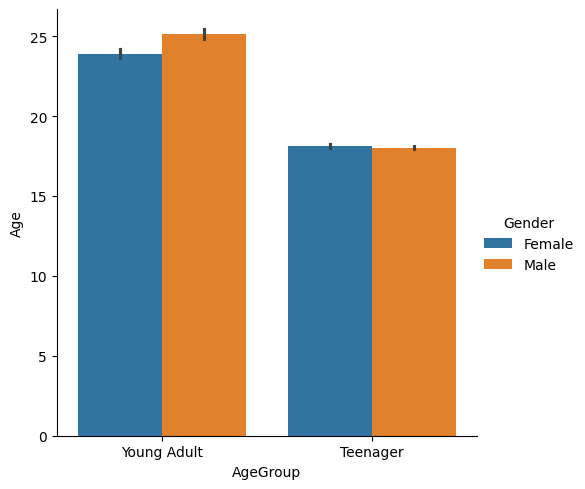

In [35]:
sns.catplot(data=df, kind="bar", x="AgeGroup", y="Age", hue="Gender")

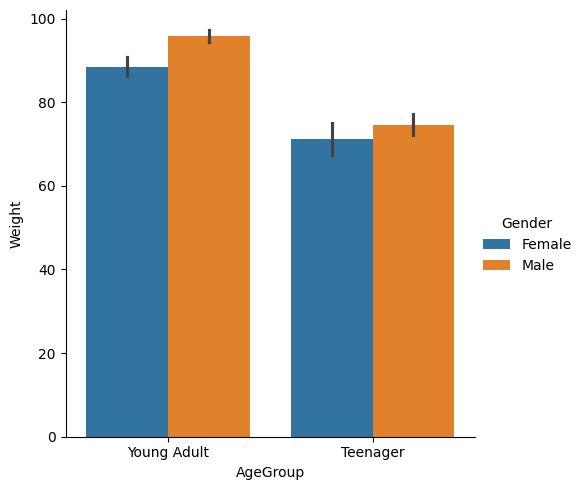

In [36]:
sns.catplot(data=df, kind="bar", x="AgeGroup", y="Weight", hue="Gender")

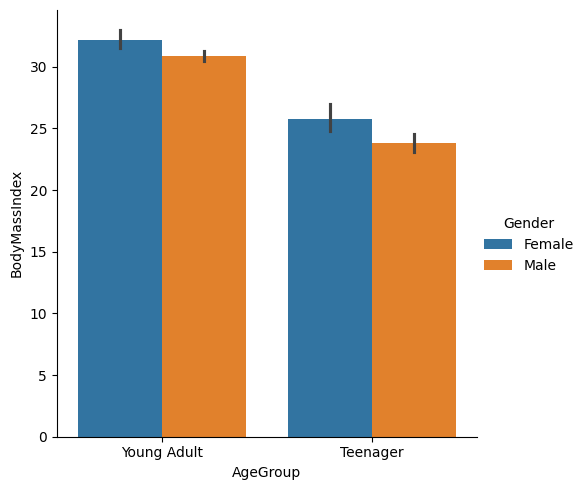

In [37]:
sns.catplot(data=df, kind="bar", x="AgeGroup", y="BodyMassIndex", hue="Gender")

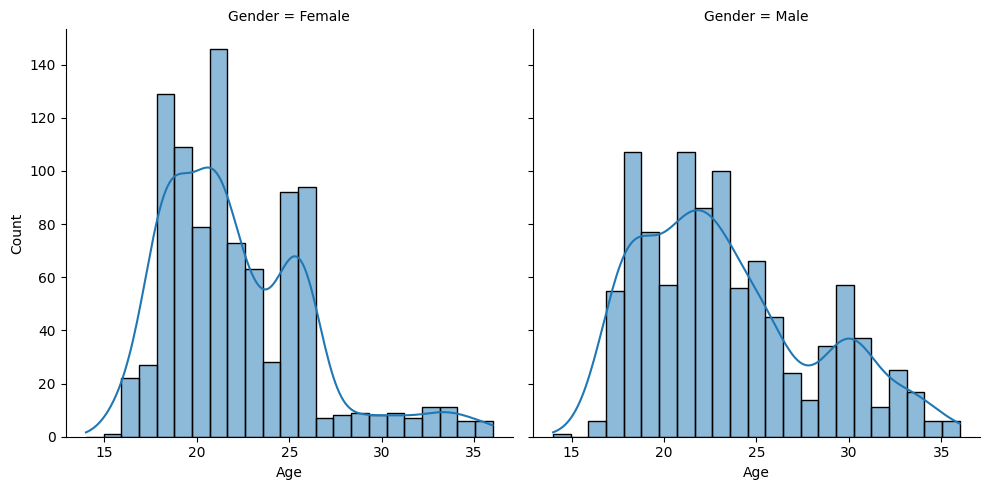

In [38]:
sns.displot(data=df, x="Age", col="Gender", kde=True)

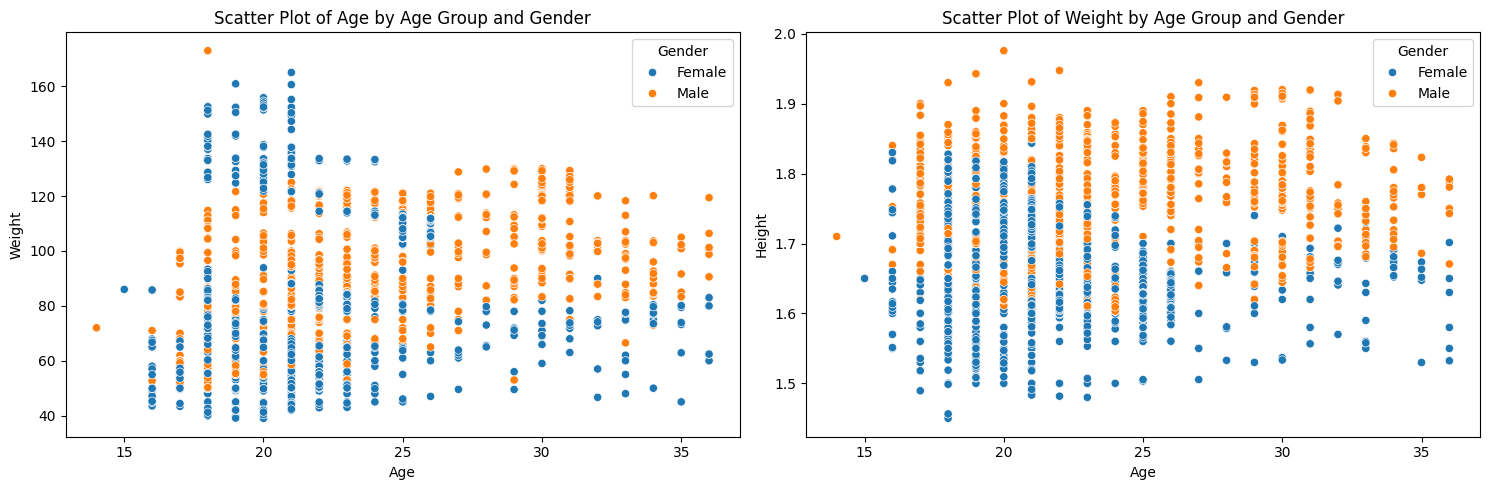

In [39]:
# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Primeiro scatter plot
sns.scatterplot(data=df, x='Age', y='Weight', hue='Gender', ax=axes[0])
axes[0].set_title('Scatter Plot of Age by Age Group and Gender')

# Segundo scatter plot
sns.scatterplot(data=df, x='Age', y='Height', hue='Gender', ax=axes[1])
axes[1].set_title('Scatter Plot of Weight by Age Group and Gender')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

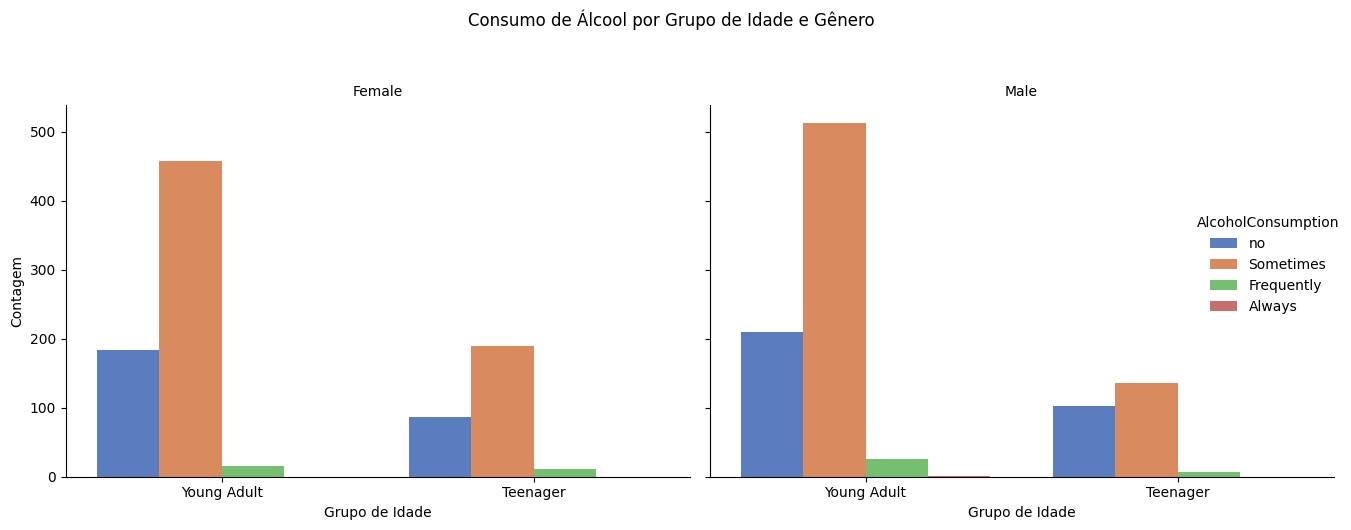

In [40]:
# Criar gráficos separados por gênero
g = sns.catplot(data=df, kind="count", x="AgeGroup", hue="AlcoholConsumption", col="Gender", palette="muted", height=5, aspect=1.2)

# Adicionar títulos aos gráficos
g.fig.suptitle('Consumo de Álcool por Grupo de Idade e Gênero', y=1.05)
g.set_axis_labels("Grupo de Idade", "Contagem")
g.set_titles("{col_name}")

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

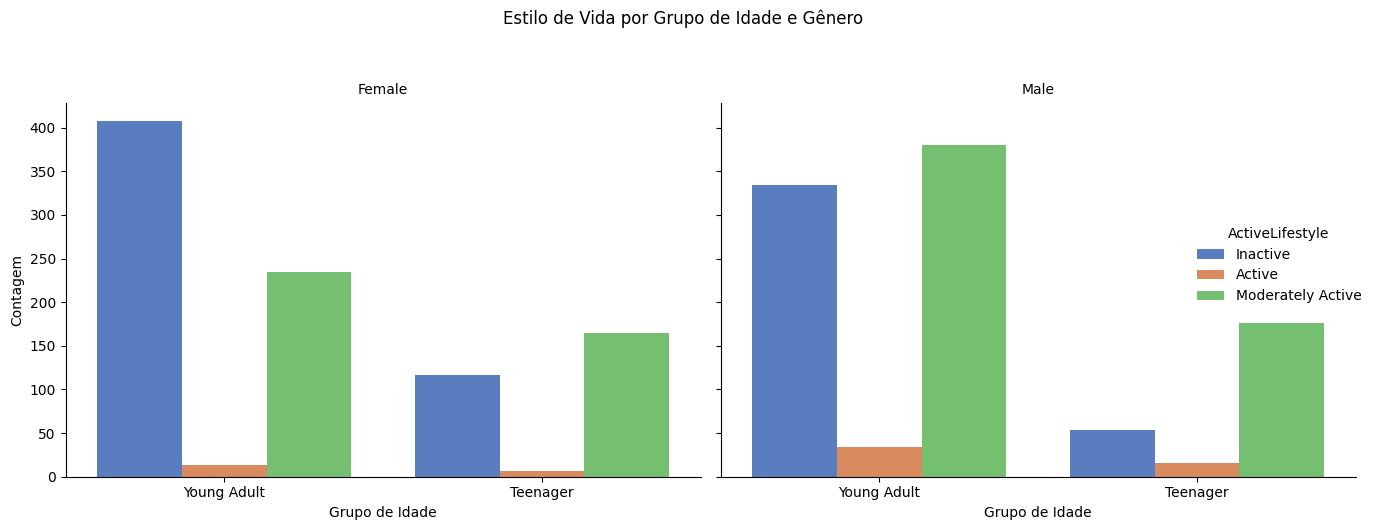

In [41]:
# Criar gráficos separados por gênero
g = sns.catplot(data=df, kind="count", x="AgeGroup", hue="ActiveLifestyle", col="Gender", palette="muted", height=5, aspect=1.2)

# Adicionar títulos aos gráficos
g.fig.suptitle('Estilo de Vida por Grupo de Idade e Gênero', y=1.05)
g.set_axis_labels("Grupo de Idade", "Contagem")
g.set_titles("{col_name}")

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

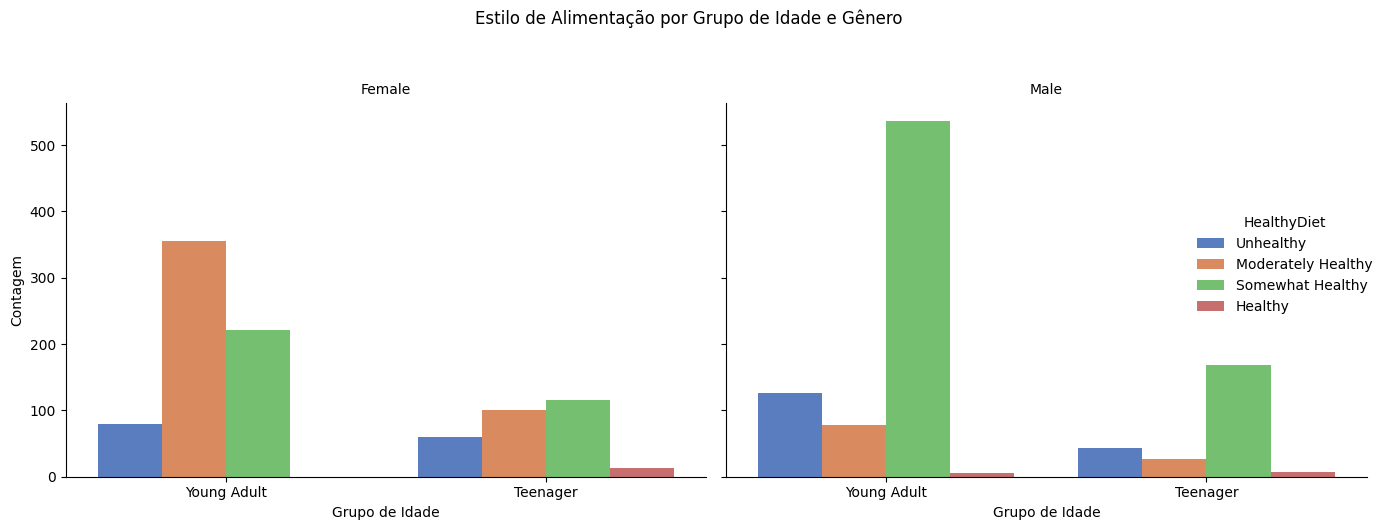

In [42]:
# Criar gráficos separados por gênero
g = sns.catplot(data=df, kind="count", x="AgeGroup", hue="HealthyDiet", col="Gender", palette="muted", height=5, aspect=1.2)

# Adicionar títulos aos gráficos
g.fig.suptitle('Estilo de Alimentação por Grupo de Idade e Gênero', y=1.05)
g.set_axis_labels("Grupo de Idade", "Contagem")
g.set_titles("{col_name}")

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

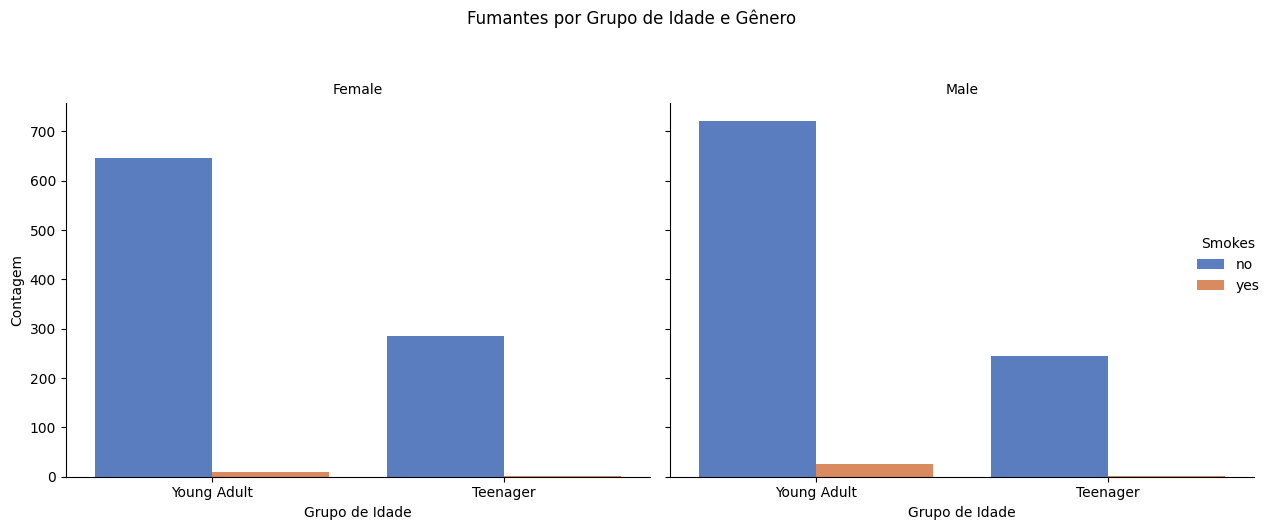

In [43]:
# Criar gráficos separados por gênero
g = sns.catplot(data=df, kind="count", x="AgeGroup", hue="Smokes", col="Gender", palette="muted", height=5, aspect=1.2)

# Adicionar títulos aos gráficos
g.fig.suptitle('Fumantes por Grupo de Idade e Gênero', y=1.05)
g.set_axis_labels("Grupo de Idade", "Contagem")
g.set_titles("{col_name}")

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

In [44]:
df.head(5)

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,NumberMeals,CalorieMonitoring,Smokes,...,PhysicalActivityFrequency,ScreenTime,Snacking,Transportation,ObesityLevel,AgeGroup,ActiveLifestyle,BodyMassIndex,HealthyDietScore,HealthyDiet
0,21,Female,1.62,64.0,no,no,2,3,no,no,...,0,1.0,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Inactive,24.386526,2,Unhealthy
1,21,Female,1.52,56.0,Sometimes,no,3,3,yes,yes,...,3,0.0,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Active,24.238227,4,Moderately Healthy
2,23,Male,1.80,77.0,Frequently,no,2,3,no,no,...,2,1.0,Sometimes,Public_Transportation,Normal_Weight,Young Adult,Moderately Active,23.765432,2,Unhealthy
3,27,Male,1.80,87.0,Frequently,no,3,3,no,no,...,2,0.0,Sometimes,Walking,Overweight_Level_I,Young Adult,Moderately Active,26.851852,3,Somewhat Healthy
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,...,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Young Adult,Inactive,28.342381,2,Unhealthy


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1939 non-null   int64  
 1   Gender                     1939 non-null   object 
 2   Height                     1939 non-null   float64
 3   Weight                     1939 non-null   float64
 4   AlcoholConsumption         1939 non-null   object 
 5   HighCalorieFood            1939 non-null   object 
 6   VegetableConsumption       1939 non-null   int64  
 7   NumberMeals                1939 non-null   int64  
 8   CalorieMonitoring          1939 non-null   object 
 9   Smokes                     1939 non-null   object 
 10  WaterIntake                1939 non-null   float64
 11  FamilyHistoryObesity       1939 non-null   object 
 12  PhysicalActivityFrequency  1939 non-null   int64  
 13  ScreenTime                 1939 non-null   float64
 1

In [46]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'AlcoholConsumption',
       'HighCalorieFood', 'VegetableConsumption', 'NumberMeals',
       'CalorieMonitoring', 'Smokes', 'WaterIntake', 'FamilyHistoryObesity',
       'PhysicalActivityFrequency', 'ScreenTime', 'Snacking', 'Transportation',
       'ObesityLevel', 'AgeGroup', 'ActiveLifestyle', 'BodyMassIndex',
       'HealthyDietScore', 'HealthyDiet'],
      dtype='object')

In [47]:
# Aplicar pd.get_dummies com drop_first=True nas colunas especificadas
columns_to_encode = ['Gender', 'AlcoholConsumption', 'HighCalorieFood', 'CalorieMonitoring',
                     'Smokes', 'FamilyHistoryObesity', 'Snacking', 'Transportation',
                     'AgeGroup', 'ActiveLifestyle', 'HealthyDiet']

df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [48]:
df_encoded

,Age,Height,Weight,VegetableConsumption,NumberMeals,WaterIntake,PhysicalActivityFrequency,ScreenTime,ObesityLevel,BodyMassIndex,...,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking,AgeGroup_Young Adult,ActiveLifestyle_Inactive,ActiveLifestyle_Moderately Active,HealthyDiet_Moderately Healthy,HealthyDiet_Somewhat Healthy,HealthyDiet_Unhealthy
0,21,1.620000,64.000000,2,3,2.000000,0,1.000000,Normal_Weight,24.386526,...,False,False,True,False,True,True,False,False,False,True
1,21,1.520000,56.000000,3,3,3.000000,3,0.000000,Normal_Weight,24.238227,...,False,False,True,False,True,False,False,True,False,False
2,23,1.800000,77.000000,2,3,2.000000,2,1.000000,Normal_Weight,23.765432,...,False,False,True,False,True,False,True,False,False,True
3,27,1.800000,87.000000,3,3,2.000000,2,0.000000,Overweight_Level_I,26.851852,...,False,False,False,True,True,False,True,False,True,False
4,22,1.780000,89.800000,2,1,2.000000,0,0.000000,Overweight_Level_II,28.342381,...,False,False,True,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,1.710730,131.408528,3,3,1.728139,1,0.906247,Obesity_Type_III,44.901475,...,False,False,True,False,True,False,True,True,False,False
2107,21,1.748584,133.742943,3,3,2.005130,1,0.599270,Obesity_Type_III,43.741923,...,False,False,True,False,True,False,True,True,False,False
2108,22,1.752206,133.689352,3,3,2.054193,1,0.646288,Obesity_Type_III,43.543817,...,False,False,True,False,True,False,True,True,False,False
2109,24,1.739450,133.346641,3,3,2.852339,1,0.586035,Obesity_Type_III,44.071535,...,False,False,True,False,True,False,True,True,False,False


In [49]:
# Converter variáveis booleanas para numéricas
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

In [50]:
df_encoded

,Age,Height,Weight,VegetableConsumption,NumberMeals,WaterIntake,PhysicalActivityFrequency,ScreenTime,ObesityLevel,BodyMassIndex,...,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking,AgeGroup_Young Adult,ActiveLifestyle_Inactive,ActiveLifestyle_Moderately Active,HealthyDiet_Moderately Healthy,HealthyDiet_Somewhat Healthy,HealthyDiet_Unhealthy
0,21,1.620000,64.000000,2,3,2.000000,0,1.000000,Normal_Weight,24.386526,...,0,0,1,0,1,1,0,0,0,1
1,21,1.520000,56.000000,3,3,3.000000,3,0.000000,Normal_Weight,24.238227,...,0,0,1,0,1,0,0,1,0,0
2,23,1.800000,77.000000,2,3,2.000000,2,1.000000,Normal_Weight,23.765432,...,0,0,1,0,1,0,1,0,0,1
3,27,1.800000,87.000000,3,3,2.000000,2,0.000000,Overweight_Level_I,26.851852,...,0,0,0,1,1,0,1,0,1,0
4,22,1.780000,89.800000,2,1,2.000000,0,0.000000,Overweight_Level_II,28.342381,...,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,1.710730,131.408528,3,3,1.728139,1,0.906247,Obesity_Type_III,44.901475,...,0,0,1,0,1,0,1,1,0,0
2107,21,1.748584,133.742943,3,3,2.005130,1,0.599270,Obesity_Type_III,43.741923,...,0,0,1,0,1,0,1,1,0,0
2108,22,1.752206,133.689352,3,3,2.054193,1,0.646288,Obesity_Type_III,43.543817,...,0,0,1,0,1,0,1,1,0,0
2109,24,1.739450,133.346641,3,3,2.852339,1,0.586035,Obesity_Type_III,44.071535,...,0,0,1,0,1,0,1,1,0,0


#Mapa de Correlação entre as variáveis

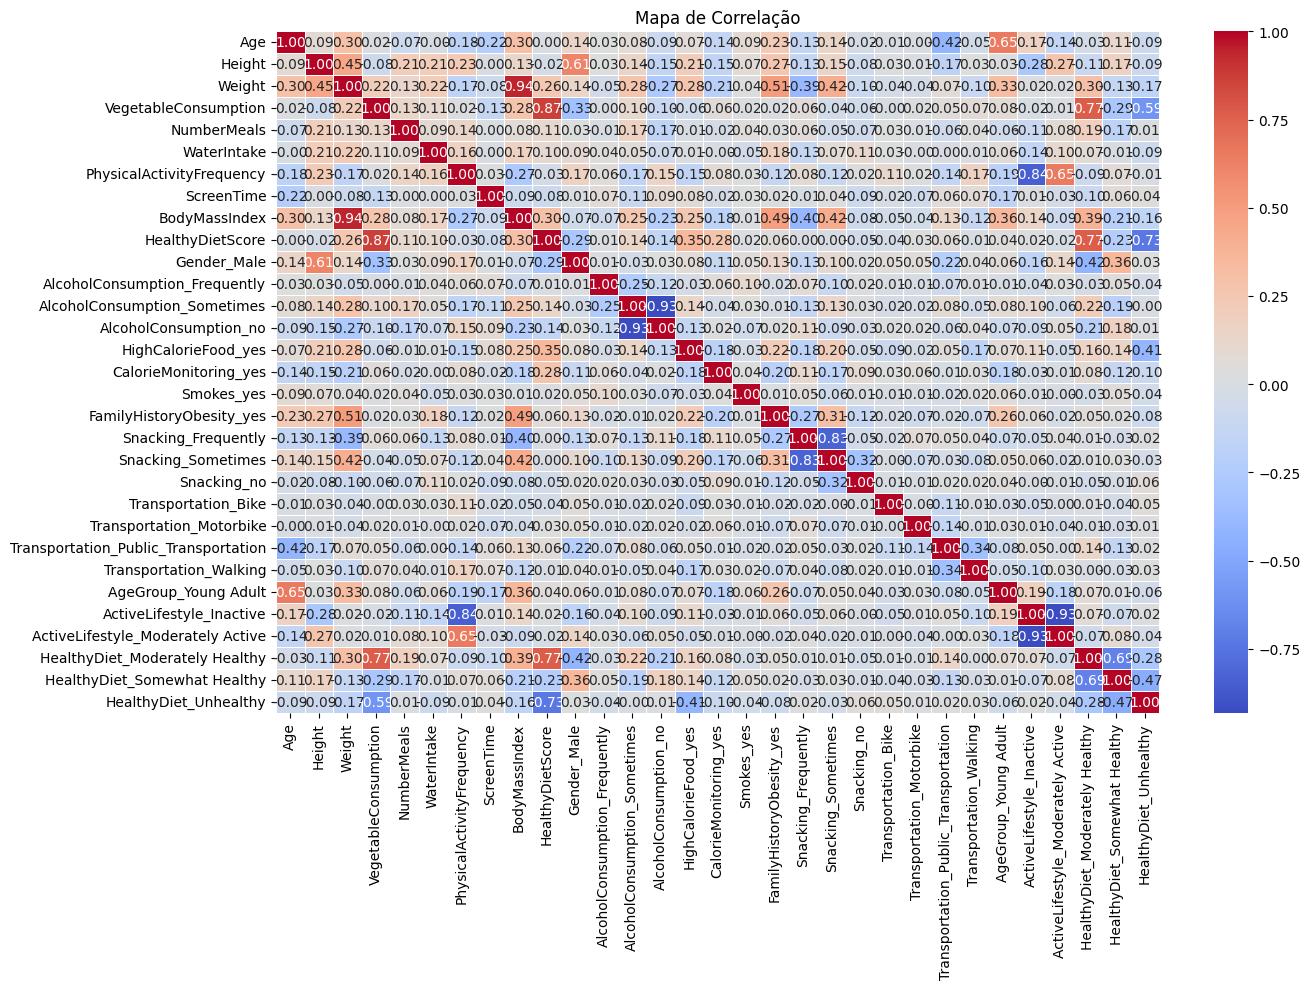

In [51]:
# Calcular a matriz de correlação
corr_matrix = (df_encoded.select_dtypes(include = ['int64','float64'])).corr()

# Criar o mapa de correlação usando seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlação')
plt.tight_layout()
plt.show()

In [52]:
"""from sklearn.ensemble import RandomForestClassifier

# Suponha que df_encoded é seu DataFrame após a aplicação de get_dummies
X = df_encoded.drop(columns=['ObesityLevel'])  # Substitua 'target_column' pelo nome da sua variável alvo
y = df_encoded['ObesityLevel']

# Treinar o modelo
model = RandomForestClassifier()
model.fit(X, y)

# Calcular a importância das variáveis
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

print(feature_importances)"""

"from sklearn.ensemble import RandomForestClassifier\n\n# Suponha que df_encoded é seu DataFrame após a aplicação de get_dummies\nX = df_encoded.drop(columns=['ObesityLevel'])  # Substitua 'target_column' pelo nome da sua variável alvo\ny = df_encoded['ObesityLevel']\n\n# Treinar o modelo\nmodel = RandomForestClassifier()\nmodel.fit(X, y)\n\n# Calcular a importância das variáveis\nfeature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)\n\nprint(feature_importances)"

In [53]:
"""import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all columns in X are numeric
X_numeric = X.select_dtypes(include=['float', 'int'])

# Calculate VIF for each numeric variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

print(vif_data)"""

'import pandas as pd\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\n# Ensure all columns in X are numeric\nX_numeric = X.select_dtypes(include=[\'float\', \'int\'])\n\n# Calculate VIF for each numeric variable\nvif_data = pd.DataFrame()\nvif_data["Feature"] = X_numeric.columns\nvif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]\n\nprint(vif_data)'

# Normalização das features

Separação das features independentes e variável dependente (target)

In [54]:
df_encoded.columns

Index(['Age', 'Height', 'Weight', 'VegetableConsumption', 'NumberMeals',
       'WaterIntake', 'PhysicalActivityFrequency', 'ScreenTime',
       'ObesityLevel', 'BodyMassIndex', 'HealthyDietScore', 'Gender_Male',
       'AlcoholConsumption_Frequently', 'AlcoholConsumption_Sometimes',
       'AlcoholConsumption_no', 'HighCalorieFood_yes', 'CalorieMonitoring_yes',
       'Smokes_yes', 'FamilyHistoryObesity_yes', 'Snacking_Frequently',
       'Snacking_Sometimes', 'Snacking_no', 'Transportation_Bike',
       'Transportation_Motorbike', 'Transportation_Public_Transportation',
       'Transportation_Walking', 'AgeGroup_Young Adult',
       'ActiveLifestyle_Inactive', 'ActiveLifestyle_Moderately Active',
       'HealthyDiet_Moderately Healthy', 'HealthyDiet_Somewhat Healthy',
       'HealthyDiet_Unhealthy'],
      dtype='object')

In [55]:
X = df_encoded.drop('ObesityLevel', axis = 1)
y = df_encoded['ObesityLevel']

In [56]:
numeric_columns = ['Age', 'NumberMeals', 'WaterIntake', 'PhysicalActivityFrequency','ScreenTime', 'BodyMassIndex', 'VegetableConsumption', 'Weight', 'Height', 'HealthyDietScore']
scaler = MinMaxScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [57]:
X

,Age,Height,Weight,VegetableConsumption,NumberMeals,WaterIntake,PhysicalActivityFrequency,ScreenTime,BodyMassIndex,HealthyDietScore,...,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking,AgeGroup_Young Adult,ActiveLifestyle_Inactive,ActiveLifestyle_Moderately Active,HealthyDiet_Moderately Healthy,HealthyDiet_Somewhat Healthy,HealthyDiet_Unhealthy
0,0.318182,0.323401,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,0.301162,0.25,...,0,0,1,0,1,1,0,0,0,1
1,0.318182,0.133165,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,0.297240,0.75,...,0,0,1,0,1,0,0,1,0,0
2,0.409091,0.665826,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0.284736,0.25,...,0,0,1,0,1,0,1,0,0,1
3,0.590909,0.665826,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0.366359,0.50,...,0,0,0,1,1,0,1,0,1,0
4,0.363636,0.627779,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0.405778,0.25,...,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.272727,0.496002,0.689616,1.0,0.666667,0.364070,0.333333,0.453124,0.843697,0.75,...,0,0,1,0,1,0,1,1,0,0
2107,0.318182,0.568014,0.707037,1.0,0.666667,0.502565,0.333333,0.299635,0.813032,0.75,...,0,0,1,0,1,0,1,1,0,0
2108,0.363636,0.574904,0.706637,1.0,0.666667,0.527097,0.333333,0.323144,0.807793,0.75,...,0,0,1,0,1,0,1,1,0,0
2109,0.454545,0.550638,0.704079,1.0,0.666667,0.926170,0.333333,0.293017,0.821749,0.75,...,0,0,1,0,1,0,1,1,0,0


#Divisão do conjunto de dados em Treino e Teste

In [58]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento dos modelos preditivos

In [59]:
# Inicializar dicionário para armazenar os resultados
model_results = {
    "Model_Name": [],
    "Train_Accuracy": [],
    "Test_Accuracy": [],
    "Time_Score": []
}

In [60]:
# Inicializar dicionário para armazenar os relatórios de classificação
classification_reports = {}

In [61]:
def model_prediction(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Previsão
    y_prediction_train = model.predict(X_train)
    y_prediction_test = model.predict(X_test)

    # Avaliação do modelo
    train_accuracy = accuracy_score(y_train, y_prediction_train)
    test_accuracy = accuracy_score(y_test, y_prediction_test)

    end_time = time.time()
    time_score = end_time - start_time

    # Obter o nome do modelo
    model_name = model.__class__.__name__

    # Armazenar resultados
    model_results["Model_Name"].append(model_name)
    model_results["Train_Accuracy"].append(train_accuracy)
    model_results["Test_Accuracy"].append(test_accuracy)
    model_results["Time_Score"].append(time_score)

    # Obter e armazenar o classification report
    report = classification_report(y_test, y_prediction_test, output_dict=True)
    classification_reports[model_name] = pd.DataFrame(report).transpose()

    # Exibir resultados
    print(f'Name of the model: {model_name}')
    print('----' * 10)
    print(f'Accuracy for Training: {train_accuracy:.4f}')
    print(f'Accuracy for Testing: {test_accuracy:.4f}')
    print("----" * 10)
    print(f'Time score is: {time_score:.4f} seconds')
    print("----" * 10)
    print("Classification Report:")
    display(classification_reports[model_name])

    return

In [62]:
# Definir os modelos
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=10000)
}

In [63]:
# Avaliar cada modelo
for name, model in models.items():
    model_prediction(model, X_train, y_train, X_test, y_test)

Name of the model: RandomForestClassifier
----------------------------------------
Accuracy for Training: 1.0000
Accuracy for Testing: 0.9768
----------------------------------------
Time score is: 0.4489 seconds
----------------------------------------
Classification Report:


,precision,recall,f1-score,support
Insufficient_Weight,1.000000,1.000000,1.000000,60.000000
Normal_Weight,0.887097,1.000000,0.940171,55.000000
Obesity_Type_I,1.000000,1.000000,1.000000,51.000000
Obesity_Type_II,0.984848,1.000000,0.992366,65.000000
Obesity_Type_III,1.000000,0.982456,0.991150,57.000000
Overweight_Level_I,0.976190,0.854167,0.911111,48.000000
Overweight_Level_II,1.000000,0.980769,0.990291,52.000000
accuracy,0.976804,0.976804,0.976804,0.976804
macro avg,0.978305,0.973913,0.975013,388.000000
weighted avg,0.978512,0.976804,0.976642,388.000000


Name of the model: GradientBoostingClassifier
----------------------------------------
Accuracy for Training: 1.0000
Accuracy for Testing: 0.9768
----------------------------------------
Time score is: 4.1244 seconds
----------------------------------------
Classification Report:


,precision,recall,f1-score,support
Insufficient_Weight,1.000000,0.983333,0.991597,60.000000
Normal_Weight,0.948276,1.000000,0.973451,55.000000
Obesity_Type_I,0.980392,0.980392,0.980392,51.000000
Obesity_Type_II,0.969697,0.984615,0.977099,65.000000
Obesity_Type_III,1.000000,0.982456,0.991150,57.000000
Overweight_Level_I,0.977778,0.916667,0.946237,48.000000
Overweight_Level_II,0.962264,0.980769,0.971429,52.000000
accuracy,0.976804,0.976804,0.976804,0.976804
macro avg,0.976915,0.975462,0.975908,388.000000
weighted avg,0.977208,0.976804,0.976743,388.000000


Name of the model: SVC
----------------------------------------
Accuracy for Training: 0.8807
Accuracy for Testing: 0.8351
----------------------------------------
Time score is: 0.8280 seconds
----------------------------------------
Classification Report:


,precision,recall,f1-score,support
Insufficient_Weight,0.910714,0.850000,0.879310,60.000000
Normal_Weight,0.577465,0.745455,0.650794,55.000000
Obesity_Type_I,0.895833,0.843137,0.868687,51.000000
Obesity_Type_II,0.955224,0.984615,0.969697,65.000000
Obesity_Type_III,1.000000,0.982456,0.991150,57.000000
Overweight_Level_I,0.731707,0.625000,0.674157,48.000000
Overweight_Level_II,0.795918,0.750000,0.772277,52.000000
accuracy,0.835052,0.835052,0.835052,0.835052
macro avg,0.838123,0.825809,0.829439,388.000000
weighted avg,0.844562,0.835052,0.837369,388.000000


Name of the model: LogisticRegression
----------------------------------------
Accuracy for Training: 0.7995
Accuracy for Testing: 0.8041
----------------------------------------
Time score is: 0.4710 seconds
----------------------------------------
Classification Report:


,precision,recall,f1-score,support
Insufficient_Weight,0.818182,0.900000,0.857143,60.000000
Normal_Weight,0.607843,0.563636,0.584906,55.000000
Obesity_Type_I,0.800000,0.705882,0.750000,51.000000
Obesity_Type_II,0.851351,0.969231,0.906475,65.000000
Obesity_Type_III,1.000000,0.982456,0.991150,57.000000
Overweight_Level_I,0.697674,0.625000,0.659341,48.000000
Overweight_Level_II,0.792453,0.807692,0.800000,52.000000
accuracy,0.804124,0.804124,0.804124,0.804124
macro avg,0.795358,0.793414,0.792716,388.000000
weighted avg,0.799887,0.804124,0.800292,388.000000


Name of the model: KNeighborsClassifier
----------------------------------------
Accuracy for Training: 0.8401
Accuracy for Testing: 0.7423
----------------------------------------
Time score is: 0.2141 seconds
----------------------------------------
Classification Report:


,precision,recall,f1-score,support
Insufficient_Weight,0.670886,0.883333,0.762590,60.000000
Normal_Weight,0.500000,0.309091,0.382022,55.000000
Obesity_Type_I,0.775510,0.745098,0.760000,51.000000
Obesity_Type_II,0.835616,0.938462,0.884058,65.000000
Obesity_Type_III,0.982456,0.982456,0.982456,57.000000
Overweight_Level_I,0.659091,0.604167,0.630435,48.000000
Overweight_Level_II,0.653846,0.653846,0.653846,52.000000
accuracy,0.742268,0.742268,0.742268,0.742268
macro avg,0.725344,0.730922,0.722201,388.000000
weighted avg,0.730040,0.742268,0.730029,388.000000


Name of the model: GaussianNB
----------------------------------------
Accuracy for Training: 0.6538
Accuracy for Testing: 0.6856
----------------------------------------
Time score is: 0.0233 seconds
----------------------------------------
Classification Report:


,precision,recall,f1-score,support
Insufficient_Weight,0.737500,0.983333,0.842857,60.000000
Normal_Weight,0.685714,0.436364,0.533333,55.000000
Obesity_Type_I,1.000000,0.431373,0.602740,51.000000
Obesity_Type_II,0.547009,0.984615,0.703297,65.000000
Obesity_Type_III,0.982456,0.982456,0.982456,57.000000
Overweight_Level_I,0.611111,0.229167,0.333333,48.000000
Overweight_Level_II,0.508475,0.576923,0.540541,52.000000
accuracy,0.685567,0.685567,0.685567,0.685567
macro avg,0.724609,0.660604,0.648365,388.000000
weighted avg,0.722407,0.685567,0.660997,388.000000


Name of the model: MLPClassifier
----------------------------------------
Accuracy for Training: 1.0000
Accuracy for Testing: 0.9175
----------------------------------------
Time score is: 8.2448 seconds
----------------------------------------
Classification Report:


,precision,recall,f1-score,support
Insufficient_Weight,0.946429,0.883333,0.913793,60.000000
Normal_Weight,0.796875,0.927273,0.857143,55.000000
Obesity_Type_I,0.959184,0.921569,0.940000,51.000000
Obesity_Type_II,0.955882,1.000000,0.977444,65.000000
Obesity_Type_III,1.000000,0.982456,0.991150,57.000000
Overweight_Level_I,0.883721,0.791667,0.835165,48.000000
Overweight_Level_II,0.884615,0.884615,0.884615,52.000000
accuracy,0.917526,0.917526,0.917526,0.917526
macro avg,0.918101,0.912988,0.914187,388.000000
weighted avg,0.920317,0.917526,0.917597,388.000000


In [64]:
# Tranformando em dataframe os resultados das métricas dos diferentes modelos
results_model_df = pd.DataFrame(model_results)

#Ensemble dos Modelos

In [65]:
# Definir o ensemble Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(multi_class='multinomial', max_iter=1000))
], voting='soft')

In [66]:
# Avaliar o ensemble
model_prediction(ensemble, X_train, y_train, X_test, y_test)

# Tranformando em dataframe os resultados das métricas do ensemble
results_model_df = pd.DataFrame(model_results)

Name of the model: VotingClassifier
----------------------------------------
Accuracy for Training: 0.9987
Accuracy for Testing: 0.9562
----------------------------------------
Time score is: 5.0712 seconds
----------------------------------------
Classification Report:


,precision,recall,f1-score,support
Insufficient_Weight,0.965517,0.933333,0.949153,60.000000
Normal_Weight,0.803030,0.963636,0.876033,55.000000
Obesity_Type_I,1.000000,0.980392,0.990099,51.000000
Obesity_Type_II,0.984848,1.000000,0.992366,65.000000
Obesity_Type_III,1.000000,0.982456,0.991150,57.000000
Overweight_Level_I,1.000000,0.854167,0.921348,48.000000
Overweight_Level_II,0.980392,0.961538,0.970874,52.000000
accuracy,0.956186,0.956186,0.956186,0.956186
macro avg,0.961970,0.953646,0.955861,388.000000
weighted avg,0.961581,0.956186,0.957050,388.000000


# Comparação dos Modelos Preditivos

In [67]:
results_model_df

,Model_Name,Train_Accuracy,Test_Accuracy,Time_Score
0,RandomForestClassifier,1.000000,0.976804,0.448918
1,GradientBoostingClassifier,1.000000,0.976804,4.124388
2,SVC,0.880722,0.835052,0.828014
3,LogisticRegression,0.799484,0.804124,0.470971
4,KNeighborsClassifier,0.840103,0.742268,0.214121
5,GaussianNB,0.653772,0.685567,0.023311
6,MLPClassifier,1.000000,0.917526,8.244782
7,VotingClassifier,0.998711,0.956186,5.071153


#Validação Cruzada

In [73]:
# Lista de modelos
models = [
    ("RandomForestClassifier", RandomForestClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("SVC", SVC(probability=True)),
    ("LogisticRegression", LogisticRegression(multi_class='multinomial', max_iter=1000)),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GaussianNB", GaussianNB()),
    ("MLPClassifier", MLPClassifier(max_iter=1000)),
    ("VotingClassifier", VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('svm', SVC(probability=True)),
        ('lr', LogisticRegression(multi_class='multinomial', max_iter=1000))
    ], voting='soft'))
]

In [78]:
# Realizar validação cruzada para todos os modelos
cv_results = {}

for name, model in models:
    cv_scores = cross_val_score(model, X, y, cv=5)
    cv_results[name] = cv_scores
    print(f'Validação Cruzada ({name}): {cv_scores}')
    print(f'Média da Validação Cruzada ({name}): {cv_scores.mean()}')

# Converter resultados de validação cruzada em DataFrame para fácil visualização
cv_df = pd.DataFrame(cv_results)
print("\nResultados da Validação Cruzada:")
print(cv_df.to_string())

Validação Cruzada (RandomForestClassifier): [0.85309278 0.99226804 0.99226804 0.99742268 0.99741602]
Média da Validação Cruzada (RandomForestClassifier): 0.9664935134127175
Validação Cruzada (GradientBoostingClassifier): [0.96391753 0.96907216 0.98453608 0.98453608 0.98449612]
Média da Validação Cruzada (GradientBoostingClassifier): 0.9773115959402222
Validação Cruzada (SVC): [0.58762887 0.86597938 0.8556701  0.85824742 0.84496124]
Média da Validação Cruzada (SVC): 0.8024974027011907
Validação Cruzada (LogisticRegression): [0.55927835 0.82731959 0.78350515 0.81958763 0.81653747]
Média da Validação Cruzada (LogisticRegression): 0.7612456378699486
Validação Cruzada (KNeighborsClassifier): [0.57474227 0.80412371 0.78350515 0.77835052 0.81395349]
Média da Validação Cruzada (KNeighborsClassifier): 0.7509350275713258
Validação Cruzada (GaussianNB): [0.53865979 0.7371134  0.70360825 0.69329897 0.71834625]
Média da Validação Cruzada (GaussianNB): 0.6782053331202217
Validação Cruzada (MLPClassi

Mais visualizações para análise

<ipython-input-68-39dc72016b37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model_Name", y="Test_Accuracy", data=results_model_df, palette='Set2')


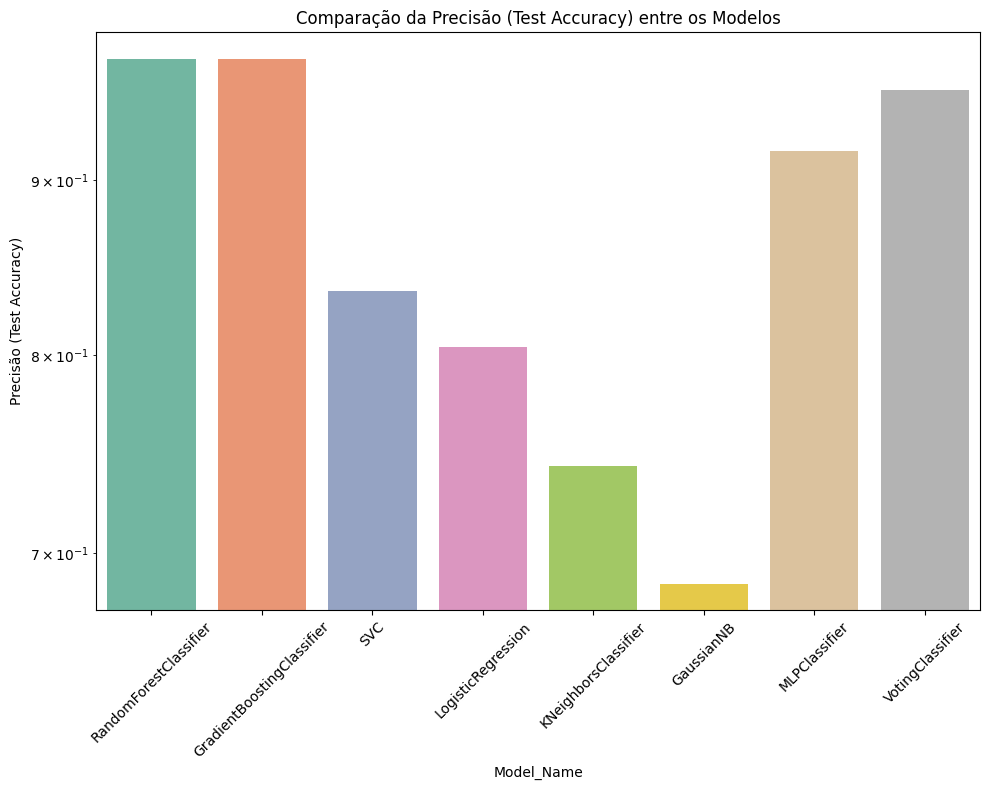

In [68]:
# Gráfico de Barras da Precisão (Test Accuracy)
plt.figure(figsize=(10, 8))
sns.barplot(x="Model_Name", y="Test_Accuracy", data=results_model_df, palette='Set2')
plt.title('Comparação da Precisão (Test Accuracy) entre os Modelos')
plt.ylabel('Precisão (Test Accuracy)')
plt.yscale('log')  # Usar escala logarítmica se necessário
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-69-11f6aa8b57b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model_Name", y="Time_Score", data=results_model_df, palette='Set2')


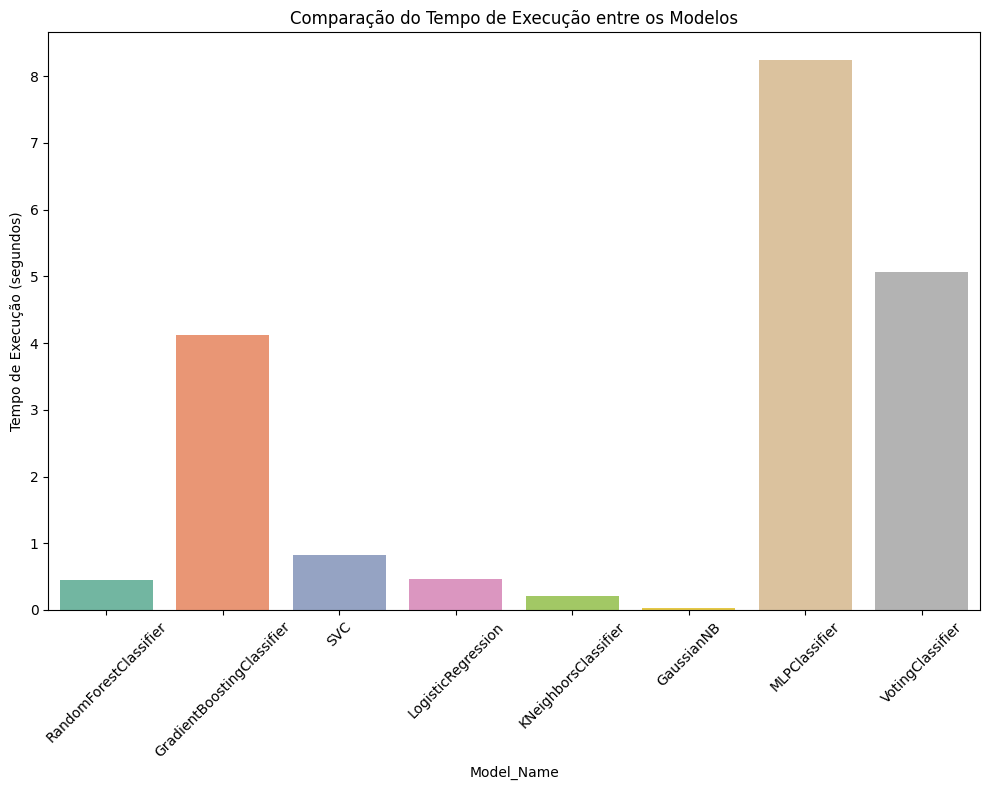

In [69]:
# Gráfico de Barras do Tempo de Execução
plt.figure(figsize=(10, 8))
sns.barplot(x="Model_Name", y="Time_Score", data=results_model_df, palette='Set2')
plt.title('Comparação do Tempo de Execução entre os Modelos')
plt.ylabel('Tempo de Execução (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
index_best_model = results_model_df['Test_Accuracy'].idxmax()

In [71]:
print(f" O modelo com a melhor precisão no teste realizado é: {results_model_df.loc[index_best_model, 'Model_Name']}")

 O modelo com a melhor precisão no teste realizado é: RandomForestClassifier


#Análise dos Resultados

**Análise Detalhada dos Modelos com Validação Cruzada:**
A validação cruzada é uma técnica essencial para avaliar a capacidade de generalização de um modelo, ajudando a identificar possíveis sinais de overfitting. A seguir, apresento a análise detalhada dos resultados obtidos com a validação cruzada para cada modelo, comparando sua performance e eficiência.

Os resultados da validação cruzada foram os seguintes:  

RandomForestClassifier apresentou uma média de validação cruzada de 0.966494, com valores variando entre 0.853093 e 0.997423. A precisão no conjunto de teste original foi de 0.984536. Esse modelo mostrou alta performance tanto na validação cruzada quanto no teste original, indicando uma boa generalização. A diferença relativamente pequena entre as precisões sugere que o modelo não está overfitted. O tempo de execução foi de 0.901966 segundos, o que é relativamente eficiente considerando a alta performance.

GradientBoostingClassifier obteve uma média de validação cruzada de 0.977312, com valores entre 0.963918 e 0.984536. A precisão no teste original foi de 0.976804. A performance é consistente entre a validação cruzada e o teste original, indicando que o modelo generaliza bem e não apresenta sinais de overfitting. No entanto, seu tempo de execução é relativamente alto, 2.835450 segundos, indicando um trade-off entre precisão e eficiência.

SVC (Support Vector Classifier) apresentou uma média de validação cruzada de 0.802497, com uma grande variação entre 0.587629 e 0.865979. A precisão no teste original foi de 0.835052. A significativa queda na precisão da validação cruzada em comparação com o teste original sugere sinais de overfitting. O tempo de execução foi de 0.658508 segundos, o que é eficiente, mas a performance é inferior.

LogisticRegression teve uma média de validação cruzada de 0.761246, com valores entre 0.559278 e 0.827320. A precisão no teste original foi de 0.804124. Similar ao SVC, a Logistic Regression mostrou uma queda na precisão da validação cruzada, indicando potencial overfitting. O modelo foi um dos mais rápidos, com um tempo de execução de 0.234257 segundos.

KNeighborsClassifier apresentou uma média de validação cruzada de 0.750935, com valores variando entre 0.574742 e 0.813953. A precisão no teste original foi de 0.742268. A performance é consistente entre a validação cruzada e o teste original, mas ambos mostram que o modelo não é altamente performático. O tempo de execução foi de 0.143550 segundos.

GaussianNB obteve a menor média de validação cruzada de 0.678205, com valores entre 0.538660 e 0.737113. A precisão no teste original foi de 0.685567. Este modelo teve a menor performance em ambos os casos, indicando que não é adequado para este conjunto de dados. No entanto, foi o mais rápido, com um tempo de execução de apenas 0.020395 segundos.

MLPClassifier (Multi-layer Perceptron) apresentou uma média de validação cruzada de 0.925244, com valores entre 0.747423 e 0.979381. A precisão no teste original foi de 0.909794. A MLPClassifier mostrou uma boa consistência entre a validação cruzada e o teste original, sugerindo boa generalização. Este modelo foi o mais lento, com um tempo de execução de 5.008494 segundos, tornando-o menos eficiente.

VotingClassifier teve uma média de validação cruzada de 0.951544, com valores entre 0.786082 e 0.994845. A precisão no teste original foi de 0.956186. Este modelo de ensemble apresentou uma performance muito boa e consistente, indicando que combina bem os pontos fortes dos modelos individuais. No entanto, o tempo de execução foi relativamente alto, 4.605780 segundos, justificando seu uso em cenários onde a precisão é crítica.

**Conclusões Gerais:**  
**Melhor Modelo em Performance:** O GradientBoostingClassifier se destacou com a maior média na validação cruzada (0.977312) e uma alta precisão no teste original (0.976804). No entanto, seu tempo de execução é relativamente alto, 2.835450 segundos.

**Modelo com Melhor Equilíbrio entre Performance e Tempo:** O RandomForestClassifier apresenta uma excelente performance (validação cruzada de 0.966494 e teste original de 0.984536) com um tempo de execução razoável (0.901966 segundos), tornando-o uma escolha balanceada.

**Modelos Potencialmente Overfitted:** Os modelos SVC e LogisticRegression mostraram uma queda significativa na precisão da validação cruzada em comparação com o teste original, indicando possíveis sinais de overfitting.

**Modelos Menos Recomendados:** Os modelos GaussianNB e KNeighborsClassifier tiveram as menores precisões tanto na validação cruzada quanto no teste original, sugerindo que não são adequados para este problema específico.

**Modelos de Ensemble:** O VotingClassifier teve uma performance robusta com uma média de validação cruzada de 0.951544 e teste original de 0.956186. Embora tenha um tempo de execução mais alto (4.605780 segundos), sua alta precisão pode justificar o custo computacional em cenários onde a precisão é crítica.

**Recomendações:**
Uso de GradientBoostingClassifier: Se a precisão é o fator mais crítico e o tempo de execução maior é aceitável, o GradientBoostingClassifier é altamente recomendado.  
Uso de RandomForestClassifier: Para um excelente equilíbrio entre precisão e eficiência, o RandomForestClassifier é a melhor escolha.  
Atenção ao Overfitting: Modelos como SVC e Logistic Regression precisam de ajustes para melhorar a generalização, talvez através de técnicas como regularização, ajuste de hiperparâmetros ou aumento do conjunto de dados de treinamento.  
Essa análise detalhada, usando a validação cruzada, fornece uma visão mais robusta da performance dos modelos e ajuda a identificar o modelo mais adequado para a tarefa específica de classificação de peso.